STUDENT DEPRESSION DATASET ANALYSIS
Dataset shape: (27901, 18)
Missing values: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       279

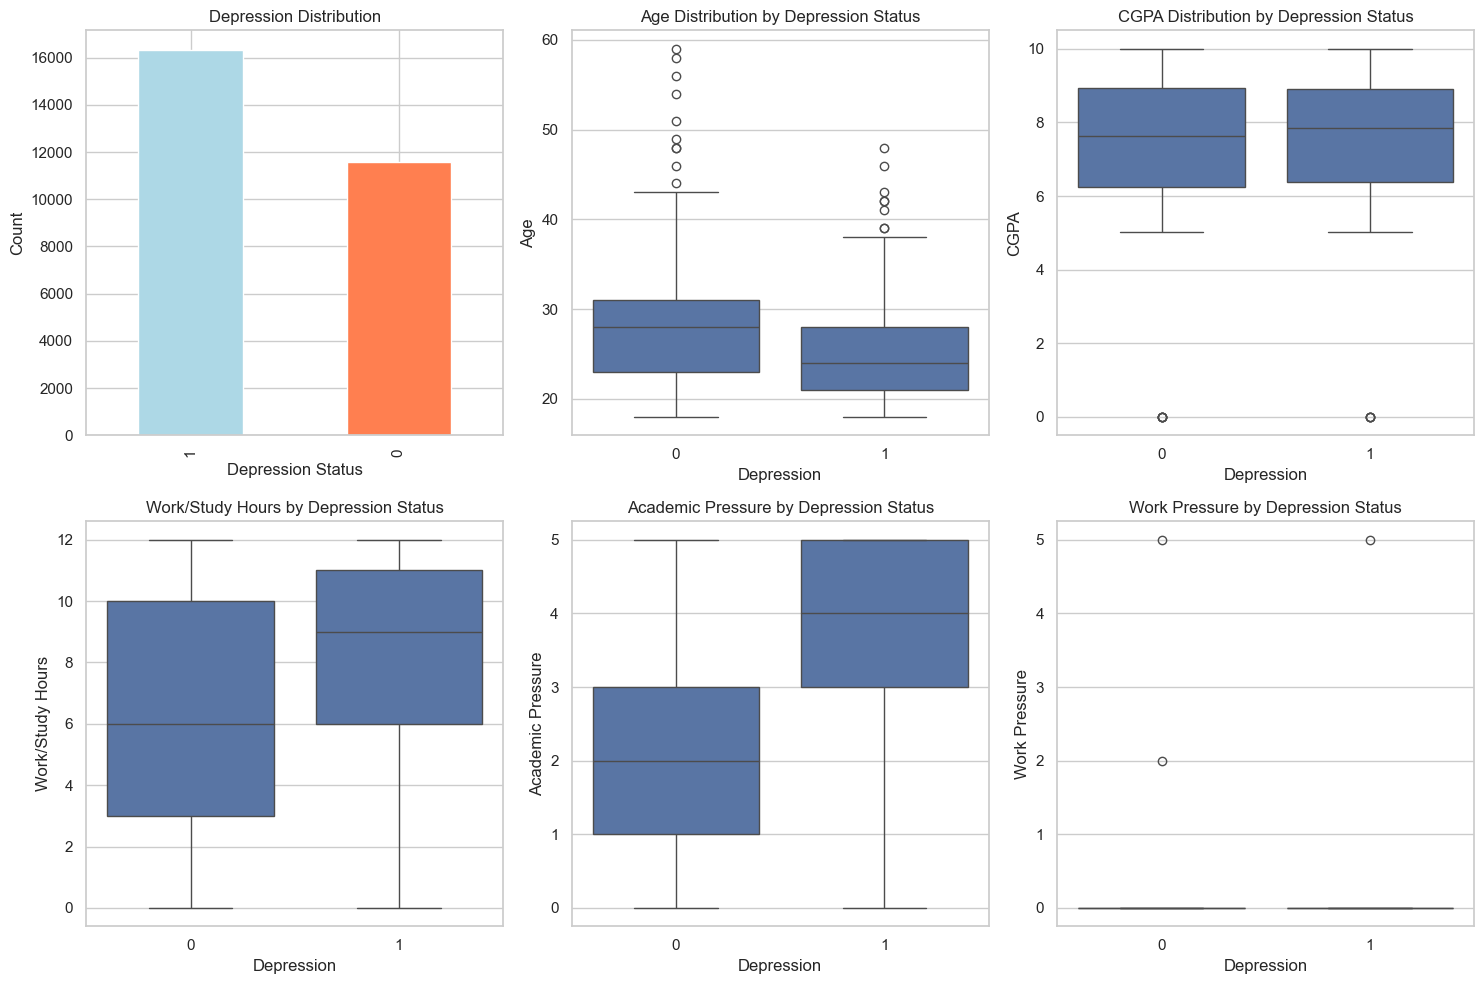


DATA PREPROCESSING
Before preprocessing - Train shape: (22320, 16), Test shape: (5581, 16)
Unknown categories in test set for 'City': {'Nalini', 'Kibara', 'Rashi', 'Vaanya', 'ME'}
Unknown categories in test set for 'Profession': {"'UX/UI Designer'"}
Training set shape: (22320, 107)
Test set shape: (5581, 107)
Features: 107

REGRESSION MODELS TRAINING

Training Linear Regression...
Train R²: 0.0048
Test R²: -0.0122
Test MSE: 0.2922
Test MAE: 0.4413

Training Ridge Regression...
Train R²: 0.0045
Test R²: -0.0120
Test MSE: 0.2922
Test MAE: 0.4415

Training Lasso Regression...
Train R²: 0.0000
Test R²: -0.0002
Test MSE: 0.2888
Test MAE: 0.4392

Training Elastic Net...
Train R²: 0.0000
Test R²: -0.0002
Test MSE: 0.2888
Test MAE: 0.4392

CLASSIFICATION MODELS TRAINING

Training Logistic Regression...
Train Accuracy: 0.8508
Test Accuracy: 0.8429
Precision: 0.8574
Recall: 0.8776
F1-Score: 0.8674
AUC: 0.9185

Training Logistic Regression L1...
Train Accuracy: 0.8506
Test Accuracy: 0.8445
Preci

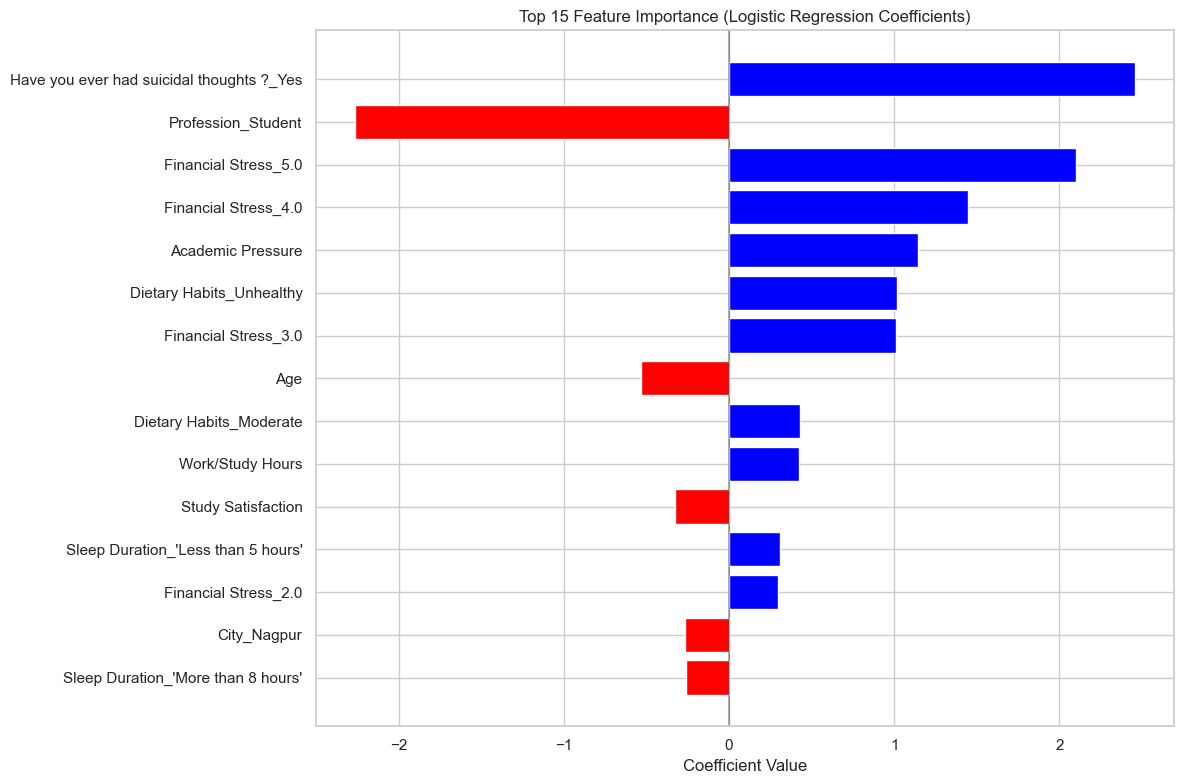


CROSS-VALIDATION ANALYSIS

Evaluating Logistic Regression...
Mean AUC: 0.9214 (+/- 0.0049)

Evaluating Ridge Logistic...
Mean AUC: 0.9214 (+/- 0.0049)

Evaluating Lasso Logistic...
Mean AUC: 0.9215 (+/- 0.0048)

CREATING VISUALIZATIONS


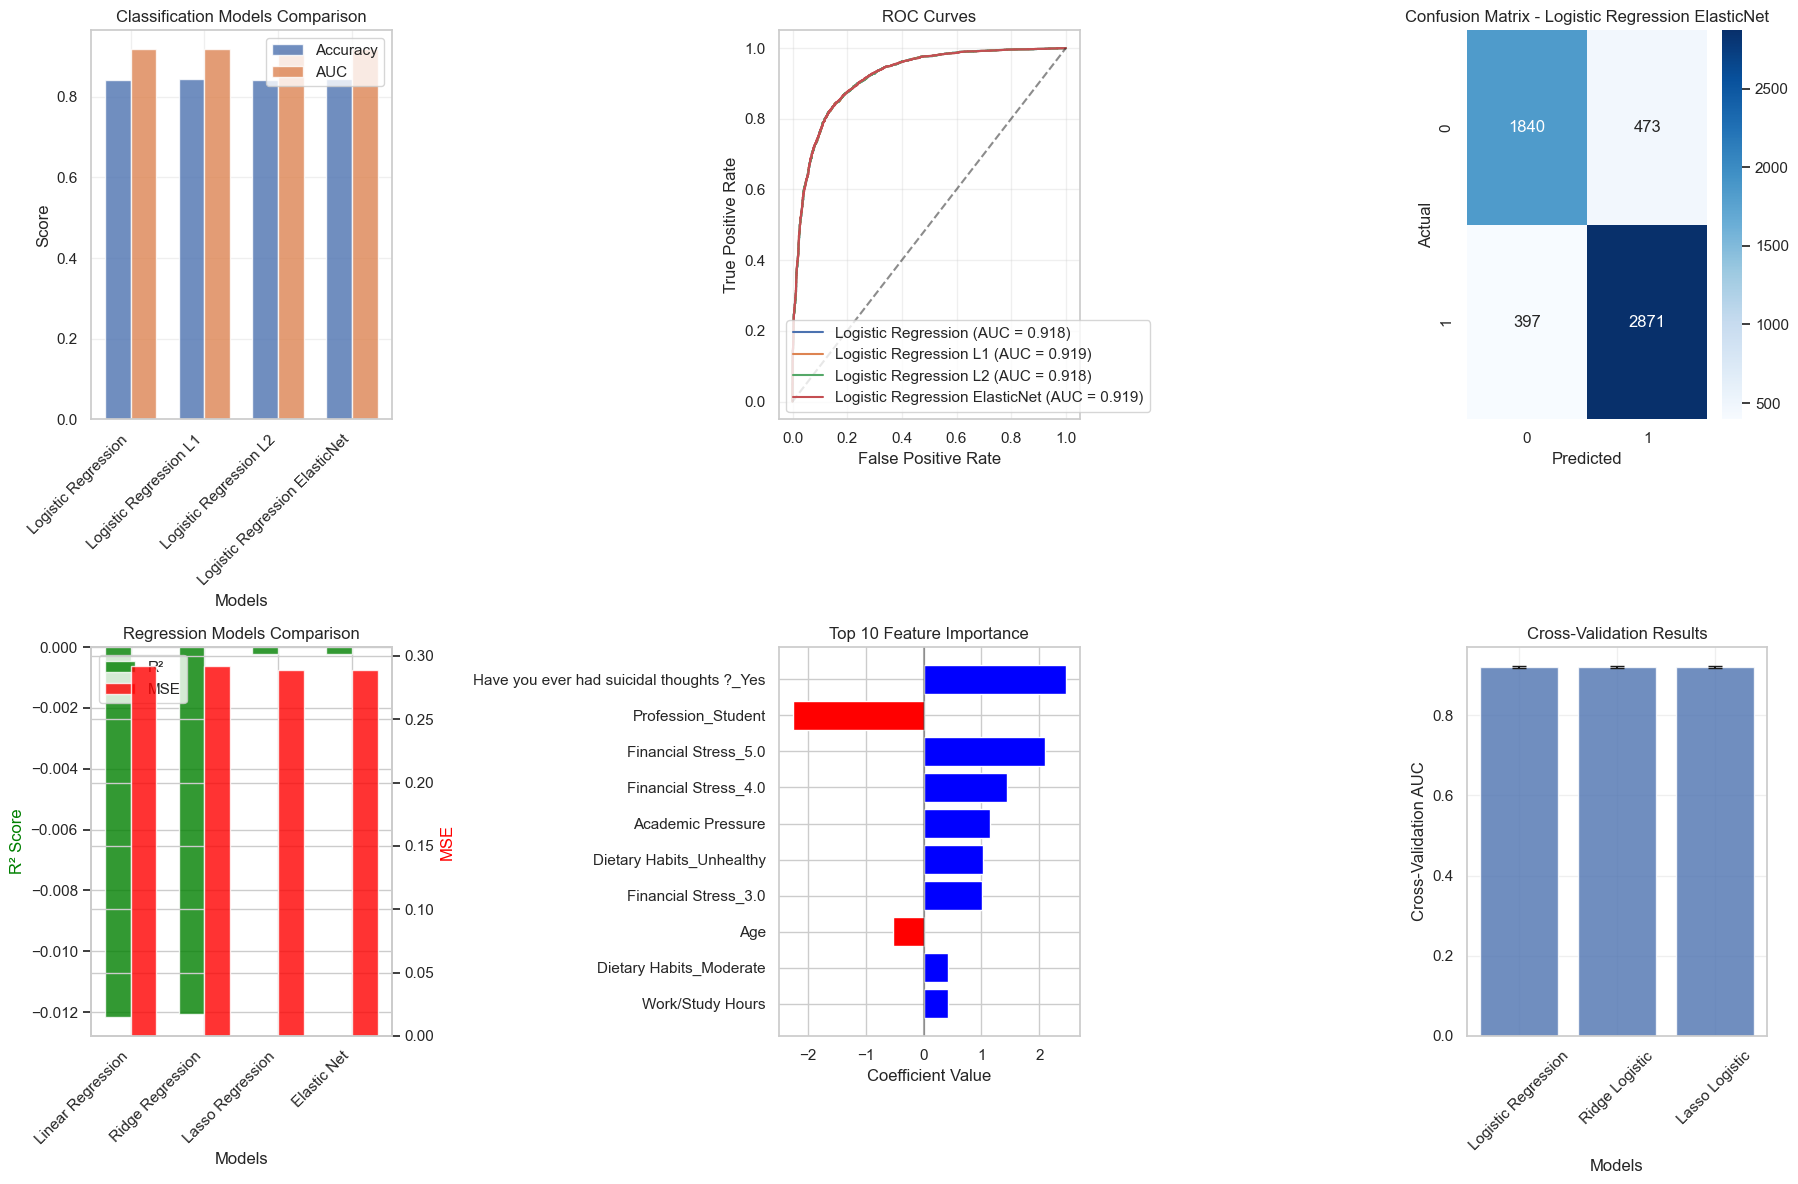


COMPREHENSIVE ANALYSIS REPORT
Dataset: 27901 samples, 18 features
Target Variable: Depression (Binary)
Depression Rate: 58.55%

CLASSIFICATION RESULTS SUMMARY

Logistic Regression:
  Accuracy: 0.8429
  Precision: 0.8574
  Recall: 0.8776
  F1-Score: 0.8674
  AUC: 0.9185

Logistic Regression L1:
  Accuracy: 0.8445
  Precision: 0.8589
  Recall: 0.8788
  F1-Score: 0.8687
  AUC: 0.9185

Logistic Regression L2:
  Accuracy: 0.8429
  Precision: 0.8574
  Recall: 0.8776
  F1-Score: 0.8674
  AUC: 0.9185

Logistic Regression ElasticNet:
  Accuracy: 0.8441
  Precision: 0.8586
  Recall: 0.8785
  F1-Score: 0.8684
  AUC: 0.9187

REGRESSION RESULTS SUMMARY

Linear Regression:
  R² Score: -0.0122
  MSE: 0.2922
  MAE: 0.4413

Ridge Regression:
  R² Score: -0.0120
  MSE: 0.2922
  MAE: 0.4415

Lasso Regression:
  R² Score: -0.0002
  MSE: 0.2888
  MAE: 0.4392

Elastic Net:
  R² Score: -0.0002
  MSE: 0.2888
  MAE: 0.4392

KEY INSIGHTS
Best Classification Model: Logistic Regression ElasticNet
  AUC: 0.9187
B

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, 
                           roc_curve, mean_squared_error, r2_score, mean_absolute_error,
                           accuracy_score, precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
import warnings
warnings.filterwarnings('ignore')

class StudentDepressionAnalyzer:
    """
    Comprehensive ML Model for Student Depression Analysis
    Using Linear Regression and Logistic Regression
    """
    
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.results = {}
        self.feature_importance = {}
        
    def load_and_explore_data(self):
        """Load and perform initial data exploration"""
        print("=" * 60)
        print("STUDENT DEPRESSION DATASET ANALYSIS")
        print("=" * 60)
        
        # Load data
        self.df = pd.read_csv(self.data_path)
        
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values: {self.df.isnull().sum().sum()}")
        
        # Basic statistics
        print("\nDataset Info:")
        print(self.df.info())
        
        print("\nTarget Variable Distribution:")
        print(self.df['Depression'].value_counts())
        print(f"Depression Rate: {(self.df['Depression'].sum() / len(self.df) * 100):.2f}%")
        
        # Visualize target distribution
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 3, 1)
        self.df['Depression'].value_counts().plot(kind='bar', color=['lightblue', 'coral'])
        plt.title('Depression Distribution')
        plt.xlabel('Depression Status')
        plt.ylabel('Count')
        
        # Age distribution by depression
        plt.subplot(2, 3, 2)
        sns.boxplot(data=self.df, x='Depression', y='Age')
        plt.title('Age Distribution by Depression Status')
        
        # CGPA distribution by depression
        plt.subplot(2, 3, 3)
        sns.boxplot(data=self.df, x='Depression', y='CGPA')
        plt.title('CGPA Distribution by Depression Status')
        
        # Work/Study Hours vs Depression
        plt.subplot(2, 3, 4)
        sns.boxplot(data=self.df, x='Depression', y='Work/Study Hours')
        plt.title('Work/Study Hours by Depression Status')
        
        # Academic Pressure vs Depression
        plt.subplot(2, 3, 5)
        sns.boxplot(data=self.df, x='Depression', y='Academic Pressure')
        plt.title('Academic Pressure by Depression Status')
        
        # Work Pressure vs Depression
        plt.subplot(2, 3, 6)
        sns.boxplot(data=self.df, x='Depression', y='Work Pressure')
        plt.title('Work Pressure by Depression Status')
        
        plt.tight_layout()
        plt.show()
        
        return self.df
    
    def preprocess_data(self):
        """Advanced data preprocessing"""
        print("\n" + "=" * 50)
        print("DATA PREPROCESSING")
        print("=" * 50)
        
        # Create a copy for processing
        df_processed = self.df.copy()
        
        # Handle categorical variables
        categorical_features = ['Gender', 'City', 'Profession', 'Sleep Duration', 
                              'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                              'Financial Stress', 'Family History of Mental Illness']
        
        numerical_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                            'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']
        
        # Create preprocessor with handle_unknown='ignore' for OneHotEncoder
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
            ]
        )
        
        # Separate features and target
        X = df_processed.drop(['id', 'Depression'], axis=1)
        y = df_processed['Depression']
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Before preprocessing - Train shape: {self.X_train.shape}, Test shape: {self.X_test.shape}")
        
        # Check for unique categories in train vs test
        for cat_feature in categorical_features:
            train_cats = set(self.X_train[cat_feature].unique())
            test_cats = set(self.X_test[cat_feature].unique())
            unknown_cats = test_cats - train_cats
            if unknown_cats:
                print(f"Unknown categories in test set for '{cat_feature}': {unknown_cats}")
        
        # Fit and transform the data
        X_train_processed = preprocessor.fit_transform(self.X_train)
        X_test_processed = preprocessor.transform(self.X_test)
        
        # Get feature names after preprocessing
        numerical_feature_names = numerical_features
        categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)
        
        # Convert to DataFrame for easier handling
        self.X_train = pd.DataFrame(X_train_processed, columns=all_feature_names)
        self.X_test = pd.DataFrame(X_test_processed, columns=all_feature_names)
        
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Features: {len(all_feature_names)}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def create_regression_models(self):
        """Create multiple regression models for continuous prediction"""
        print("\n" + "=" * 50)
        print("REGRESSION MODELS TRAINING")
        print("=" * 50)
        
        # Create continuous target from categorical features using only training data indices
        train_indices = self.X_train.index
        
        # Create depression score from original data
        df_train_subset = self.df.loc[self.df.index.isin(train_indices)]
        
        depression_score = (
            df_train_subset['Academic Pressure'] * 0.3 +
            df_train_subset['Work Pressure'] * 0.3 +
            (10 - df_train_subset['CGPA']) * 0.2 +  # Inverse CGPA
            (10 - df_train_subset['Study Satisfaction']) * 0.1 +
            (10 - df_train_subset['Job Satisfaction']) * 0.1
        )
        
        # Reset index to match X_train
        depression_score = depression_score.reset_index(drop=True)
        X_train_reset = self.X_train.reset_index(drop=True)
        
        # Split for regression (from already preprocessed data)
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            X_train_reset, depression_score, test_size=0.2, random_state=42
        )
        
        # Define regression models
        regression_models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=0.1),
            'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)
        }
        
        # Train and evaluate regression models
        regression_results = {}
        
        for name, model in regression_models.items():
            print(f"\nTraining {name}...")
            
            # Train model
            model.fit(X_train_reg, y_train_reg)
            
            # Predictions
            y_pred_train = model.predict(X_train_reg)
            y_pred_test = model.predict(X_test_reg)
            
            # Metrics
            train_mse = mean_squared_error(y_train_reg, y_pred_train)
            test_mse = mean_squared_error(y_test_reg, y_pred_test)
            train_r2 = r2_score(y_train_reg, y_pred_train)
            test_r2 = r2_score(y_test_reg, y_pred_test)
            test_mae = mean_absolute_error(y_test_reg, y_pred_test)
            
            regression_results[name] = {
                'model': model,
                'train_mse': train_mse,
                'test_mse': test_mse,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'test_mae': test_mae
            }
            
            print(f"Train R²: {train_r2:.4f}")
            print(f"Test R²: {test_r2:.4f}")
            print(f"Test MSE: {test_mse:.4f}")
            print(f"Test MAE: {test_mae:.4f}")
        
        self.models['regression'] = regression_models
        self.results['regression'] = regression_results
        
        return regression_results
    
    def create_classification_models(self):
        """Create multiple logistic regression models"""
        print("\n" + "=" * 50)
        print("CLASSIFICATION MODELS TRAINING")
        print("=" * 50)
        
        # Define classification models
        classification_models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Logistic Regression L1': LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
            'Logistic Regression L2': LogisticRegression(penalty='l2', random_state=42, max_iter=1000),
            'Logistic Regression ElasticNet': LogisticRegression(penalty='elasticnet', l1_ratio=0.5, 
                                                               solver='saga', random_state=42, max_iter=1000)
        }
        
        # Train and evaluate classification models
        classification_results = {}
        
        for name, model in classification_models.items():
            print(f"\nTraining {name}...")
            
            # Train model
            model.fit(self.X_train, self.y_train)
            
            # Predictions
            y_pred_train = model.predict(self.X_train)
            y_pred_test = model.predict(self.X_test)
            y_pred_proba = model.predict_proba(self.X_test)[:, 1]
            
            # Metrics
            train_acc = accuracy_score(self.y_train, y_pred_train)
            test_acc = accuracy_score(self.y_test, y_pred_test)
            precision = precision_score(self.y_test, y_pred_test)
            recall = recall_score(self.y_test, y_pred_test)
            f1 = f1_score(self.y_test, y_pred_test)
            auc = roc_auc_score(self.y_test, y_pred_proba)
            
            classification_results[name] = {
                'model': model,
                'train_acc': train_acc,
                'test_acc': test_acc,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc,
                'y_pred': y_pred_test,
                'y_pred_proba': y_pred_proba
            }
            
            print(f"Train Accuracy: {train_acc:.4f}")
            print(f"Test Accuracy: {test_acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"AUC: {auc:.4f}")
        
        self.models['classification'] = classification_models
        self.results['classification'] = classification_results
        
        return classification_results
    
    def hyperparameter_tuning(self):
        """Perform hyperparameter tuning for best models"""
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING")
        print("=" * 50)
        
        # Tuning for Logistic Regression
        print("Tuning Logistic Regression...")
        
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
        
        grid_search = GridSearchCV(
            LogisticRegression(random_state=42, max_iter=1000),
            param_grid,
            cv=5,
            scoring='roc_auc',
            n_jobs=-1
        )
        
        grid_search.fit(self.X_train, self.y_train)
        
        best_logistic = grid_search.best_estimator_
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")
        
        # Evaluate best model
        y_pred_best = best_logistic.predict(self.X_test)
        y_pred_proba_best = best_logistic.predict_proba(self.X_test)[:, 1]
        
        best_results = {
            'accuracy': accuracy_score(self.y_test, y_pred_best),
            'precision': precision_score(self.y_test, y_pred_best),
            'recall': recall_score(self.y_test, y_pred_best),
            'f1': f1_score(self.y_test, y_pred_best),
            'auc': roc_auc_score(self.y_test, y_pred_proba_best)
        }
        
        print("\nBest Model Performance:")
        for metric, value in best_results.items():
            print(f"{metric.capitalize()}: {value:.4f}")
        
        self.models['best_classification'] = best_logistic
        self.results['best_classification'] = best_results
        
        return best_logistic, best_results
    
    def feature_importance_analysis(self):
        """Analyze feature importance"""
        print("\n" + "=" * 50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("=" * 50)
        
        # Get best logistic regression model
        best_model = self.models.get('best_classification', 
                                   self.models['classification']['Logistic Regression'])
        
        # Feature importance from coefficients
        feature_names = self.X_train.columns
        coefficients = best_model.coef_[0]
        
        # Create feature importance DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False)
        
        print("Top 15 Most Important Features:")
        print(importance_df.head(15)[['feature', 'coefficient']].to_string(index=False))
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        top_features = importance_df.head(15)
        
        colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
        
        plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Coefficient Value')
        plt.title('Top 15 Feature Importance (Logistic Regression Coefficients)')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        self.feature_importance = importance_df
        
        return importance_df
    
    def cross_validation_analysis(self):
        """Perform cross-validation analysis"""
        print("\n" + "=" * 50)
        print("CROSS-VALIDATION ANALYSIS")
        print("=" * 50)
        
        # Models to evaluate
        models_to_evaluate = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Ridge Logistic': LogisticRegression(penalty='l2', C=1.0, random_state=42, max_iter=1000),
            'Lasso Logistic': LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        }
        
        cv_results = {}
        
        # Stratified K-Fold for imbalanced dataset
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        for name, model in models_to_evaluate.items():
            print(f"\nEvaluating {name}...")
            
            # Cross-validation scores
            cv_scores = cross_val_score(model, self.X_train, self.y_train, 
                                      cv=skf, scoring='roc_auc')
            
            cv_results[name] = {
                'mean_auc': cv_scores.mean(),
                'std_auc': cv_scores.std(),
                'scores': cv_scores
            }
            
            print(f"Mean AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        self.results['cross_validation'] = cv_results
        
        return cv_results
    
    def visualize_results(self):
        """Create comprehensive visualization of results"""
        print("\n" + "=" * 50)
        print("CREATING VISUALIZATIONS")
        print("=" * 50)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. Model Comparison - Classification
        if 'classification' in self.results:
            model_names = list(self.results['classification'].keys())
            accuracies = [self.results['classification'][name]['test_acc'] for name in model_names]
            aucs = [self.results['classification'][name]['auc'] for name in model_names]
            
            x = np.arange(len(model_names))
            width = 0.35
            
            axes[0, 0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
            axes[0, 0].bar(x + width/2, aucs, width, label='AUC', alpha=0.8)
            axes[0, 0].set_xlabel('Models')
            axes[0, 0].set_ylabel('Score')
            axes[0, 0].set_title('Classification Models Comparison')
            axes[0, 0].set_xticks(x)
            axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3)
        
        # 2. ROC Curve
        if 'classification' in self.results:
            for name, results in self.results['classification'].items():
                fpr, tpr, _ = roc_curve(self.y_test, results['y_pred_proba'])
                axes[0, 1].plot(fpr, tpr, label=f"{name} (AUC = {results['auc']:.3f})")
            
            axes[0, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
            axes[0, 1].set_xlabel('False Positive Rate')
            axes[0, 1].set_ylabel('True Positive Rate')
            axes[0, 1].set_title('ROC Curves')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Confusion Matrix (Best Model)
        if 'classification' in self.results:
            best_model_name = max(self.results['classification'].keys(), 
                                key=lambda x: self.results['classification'][x]['auc'])
            y_pred = self.results['classification'][best_model_name]['y_pred']
            
            cm = confusion_matrix(self.y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
            axes[0, 2].set_title(f'Confusion Matrix - {best_model_name}')
            axes[0, 2].set_xlabel('Predicted')
            axes[0, 2].set_ylabel('Actual')
        
        # 4. Regression Models Comparison
        if 'regression' in self.results:
            reg_names = list(self.results['regression'].keys())
            r2_scores = [self.results['regression'][name]['test_r2'] for name in reg_names]
            mse_scores = [self.results['regression'][name]['test_mse'] for name in reg_names]
            
            x = np.arange(len(reg_names))
            
            ax1 = axes[1, 0]
            ax2 = ax1.twinx()
            
            bars1 = ax1.bar(x - width/2, r2_scores, width, label='R²', alpha=0.8, color='green')
            bars2 = ax2.bar(x + width/2, mse_scores, width, label='MSE', alpha=0.8, color='red')
            
            ax1.set_xlabel('Models')
            ax1.set_ylabel('R² Score', color='green')
            ax2.set_ylabel('MSE', color='red')
            ax1.set_title('Regression Models Comparison')
            ax1.set_xticks(x)
            ax1.set_xticklabels(reg_names, rotation=45, ha='right')
            
            # Legends
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        # 5. Feature Importance (Top 10)
        if hasattr(self, 'feature_importance'):
            top_10 = self.feature_importance.head(10)
            
            colors = ['red' if x < 0 else 'blue' for x in top_10['coefficient']]
            
            axes[1, 1].barh(range(len(top_10)), top_10['coefficient'], color=colors)
            axes[1, 1].set_yticks(range(len(top_10)))
            axes[1, 1].set_yticklabels(top_10['feature'])
            axes[1, 1].set_xlabel('Coefficient Value')
            axes[1, 1].set_title('Top 10 Feature Importance')
            axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
            axes[1, 1].invert_yaxis()
        
        # 6. Cross-Validation Results
        if 'cross_validation' in self.results:
            cv_models = list(self.results['cross_validation'].keys())
            cv_means = [self.results['cross_validation'][name]['mean_auc'] for name in cv_models]
            cv_stds = [self.results['cross_validation'][name]['std_auc'] for name in cv_models]
            
            axes[1, 2].bar(cv_models, cv_means, yerr=cv_stds, capsize=5, alpha=0.8)
            axes[1, 2].set_xlabel('Models')
            axes[1, 2].set_ylabel('Cross-Validation AUC')
            axes[1, 2].set_title('Cross-Validation Results')
            axes[1, 2].tick_params(axis='x', rotation=45)
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def generate_final_report(self):
        """Generate comprehensive final report"""
        print("\n" + "=" * 60)
        print("COMPREHENSIVE ANALYSIS REPORT")
        print("=" * 60)
        
        print(f"Dataset: {self.df.shape[0]} samples, {self.df.shape[1]} features")
        print(f"Target Variable: Depression (Binary)")
        print(f"Depression Rate: {(self.df['Depression'].sum() / len(self.df) * 100):.2f}%")
        
        print("\n" + "="*40)
        print("CLASSIFICATION RESULTS SUMMARY")
        print("="*40)
        
        if 'classification' in self.results:
            for name, results in self.results['classification'].items():
                print(f"\n{name}:")
                print(f"  Accuracy: {results['test_acc']:.4f}")
                print(f"  Precision: {results['precision']:.4f}")
                print(f"  Recall: {results['recall']:.4f}")
                print(f"  F1-Score: {results['f1']:.4f}")
                print(f"  AUC: {results['auc']:.4f}")
        
        print("\n" + "="*40)
        print("REGRESSION RESULTS SUMMARY")
        print("="*40)
        
        if 'regression' in self.results:
            for name, results in self.results['regression'].items():
                print(f"\n{name}:")
                print(f"  R² Score: {results['test_r2']:.4f}")
                print(f"  MSE: {results['test_mse']:.4f}")
                print(f"  MAE: {results['test_mae']:.4f}")
        
        print("\n" + "="*40)
        print("KEY INSIGHTS")
        print("="*40)
        
        # Best performing models
        if 'classification' in self.results:
            best_clf = max(self.results['classification'].keys(), 
                          key=lambda x: self.results['classification'][x]['auc'])
            print(f"Best Classification Model: {best_clf}")
            print(f"  AUC: {self.results['classification'][best_clf]['auc']:.4f}")
        
        if 'regression' in self.results:
            best_reg = max(self.results['regression'].keys(), 
                          key=lambda x: self.results['regression'][x]['test_r2'])
            print(f"Best Regression Model: {best_reg}")
            print(f"  R²: {self.results['regression'][best_reg]['test_r2']:.4f}")
        
        # Top risk factors
        if hasattr(self, 'feature_importance'):
            print(f"\nTop 5 Depression Risk Factors:")
            top_5_risk = self.feature_importance.head(5)
            for i, (_, row) in enumerate(top_5_risk.iterrows(), 1):
                direction = "increases" if row['coefficient'] > 0 else "decreases"
                print(f"  {i}. {row['feature']} ({direction} risk)")
        
        print("\n" + "="*40)
        print("RECOMMENDATIONS")
        print("="*40)
        print("1. Focus on managing Academic and Work Pressure")
        print("2. Improve Sleep Duration and Quality")
        print("3. Address Financial Stress factors")
        print("4. Consider Family History in prevention programs")
        print("5. Monitor students with low CGPA more closely")
        print("6. Implement early intervention programs based on risk factors")

# Usage Example
def main():
    """Main execution function"""
    # Initialize analyzer
    analyzer = StudentDepressionAnalyzer('./data/linear-regression/student_depression_dataset.csv')
    
    # Run complete analysis pipeline
    try:
        # 1. Load and explore data
        analyzer.load_and_explore_data()
        
        # 2. Preprocess data
        analyzer.preprocess_data()
        
        # 3. Create regression models
        analyzer.create_regression_models()
        
        # 4. Create classification models
        analyzer.create_classification_models()
        
        # 5. Hyperparameter tuning
        analyzer.hyperparameter_tuning()
        
        # 6. Feature importance analysis
        analyzer.feature_importance_analysis()
        
        # 7. Cross-validation analysis
        analyzer.cross_validation_analysis()
        
        # 8. Visualize results
        analyzer.visualize_results()
        
        # 9. Generate final report
        analyzer.generate_final_report()
        
        print("\n" + "="*60)
        print("ANALYSIS COMPLETED SUCCESSFULLY!")
        print("="*60)
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

STUDENT DEPRESSION DATASET ANALYSIS
Dataset shape: (27901, 18)
Missing values: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       279

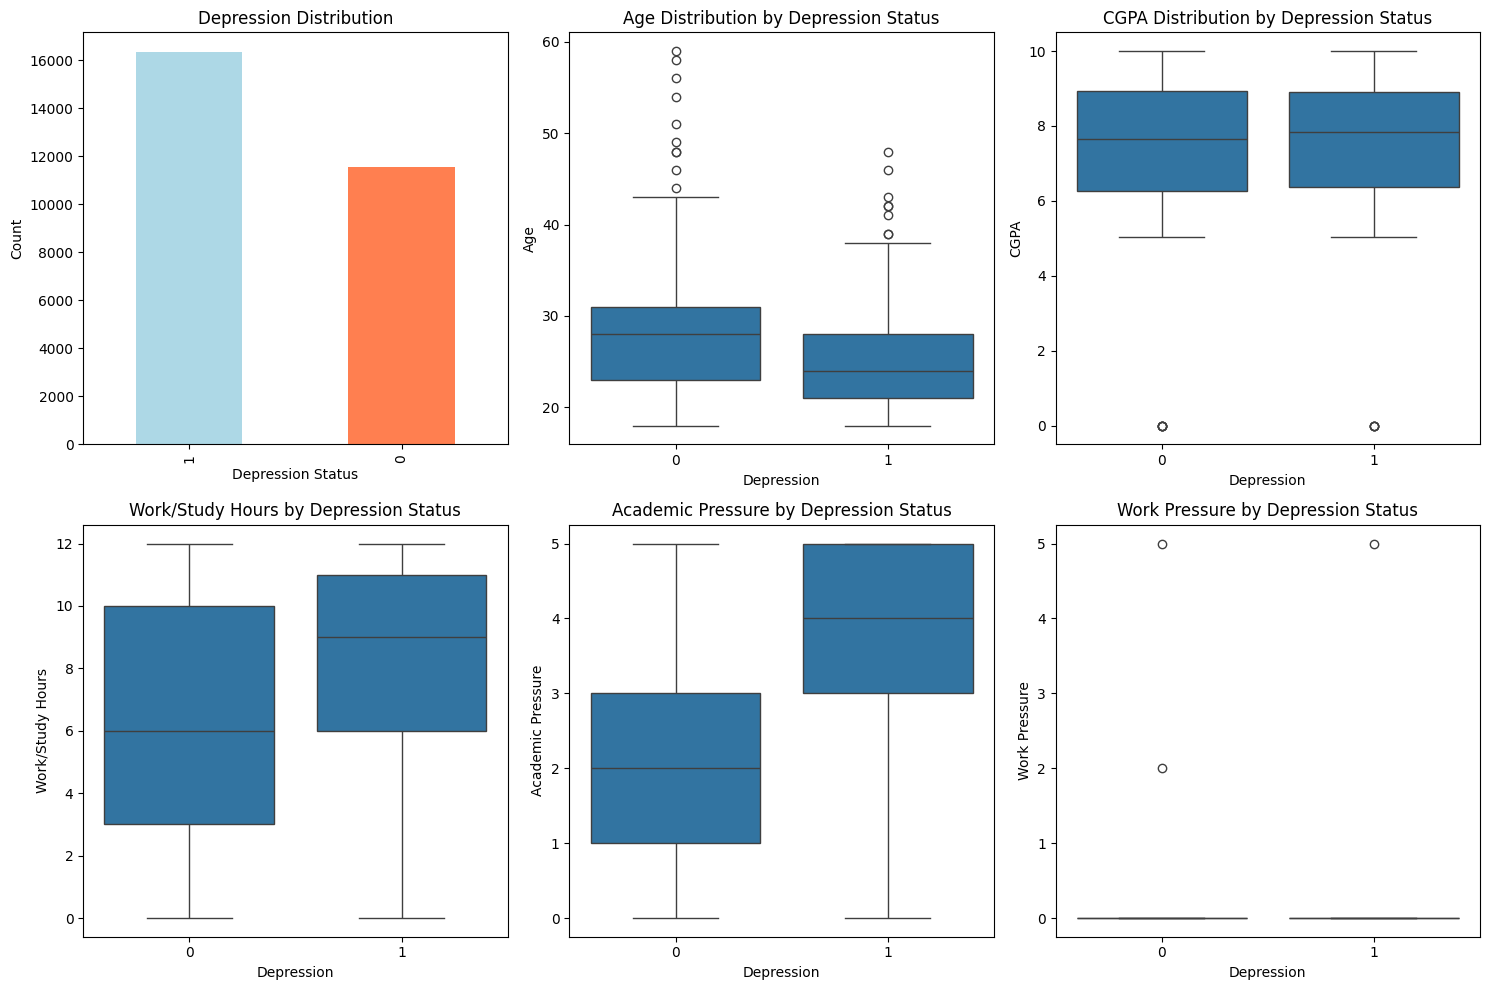


DATA PREPROCESSING
Before preprocessing - Train shape: (22320, 16), Test shape: (5581, 16)
Training set shape: (22320, 107)
Test set shape: (5581, 107)
Features: 107

LINEAR REGRESSION TRAINING
Linear Regression Results:
Train R²: 0.0048
Test R²: -0.0122
Test MSE: 0.2922
Test MAE: 0.4413

LOGISTIC REGRESSION TRAINING
Logistic Regression Results:
Train Accuracy: 0.8508
Test Accuracy: 0.8429
Precision: 0.8574
Recall: 0.8776
F1-Score: 0.8674
AUC: 0.9185

FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
                                  feature  coefficient
Have you ever had suicidal thoughts ?_Yes     2.511378
                     Financial Stress_5.0     2.236856
                       Profession_Student    -1.577633
                     Financial Stress_4.0     1.570485
                        Academic Pressure     1.166184
                     Financial Stress_3.0     1.131951
                 Dietary Habits_Unhealthy     1.083677
                                      Age  

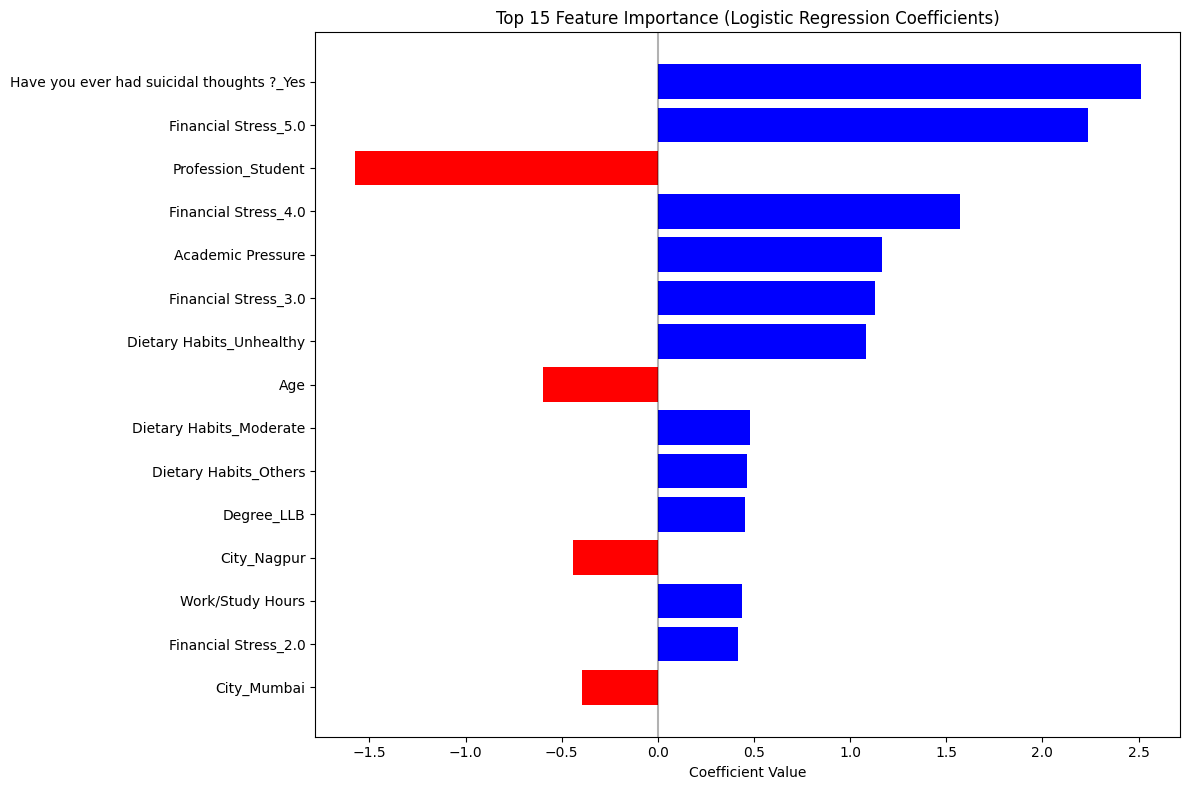


CROSS-VALIDATION ANALYSIS
Logistic Regression Cross-Validation:
Mean AUC: 0.9214 (+/- 0.0049)
Individual fold scores: [0.92142724 0.91976095 0.92346719 0.92454364 0.91785369]

CREATING VISUALIZATIONS


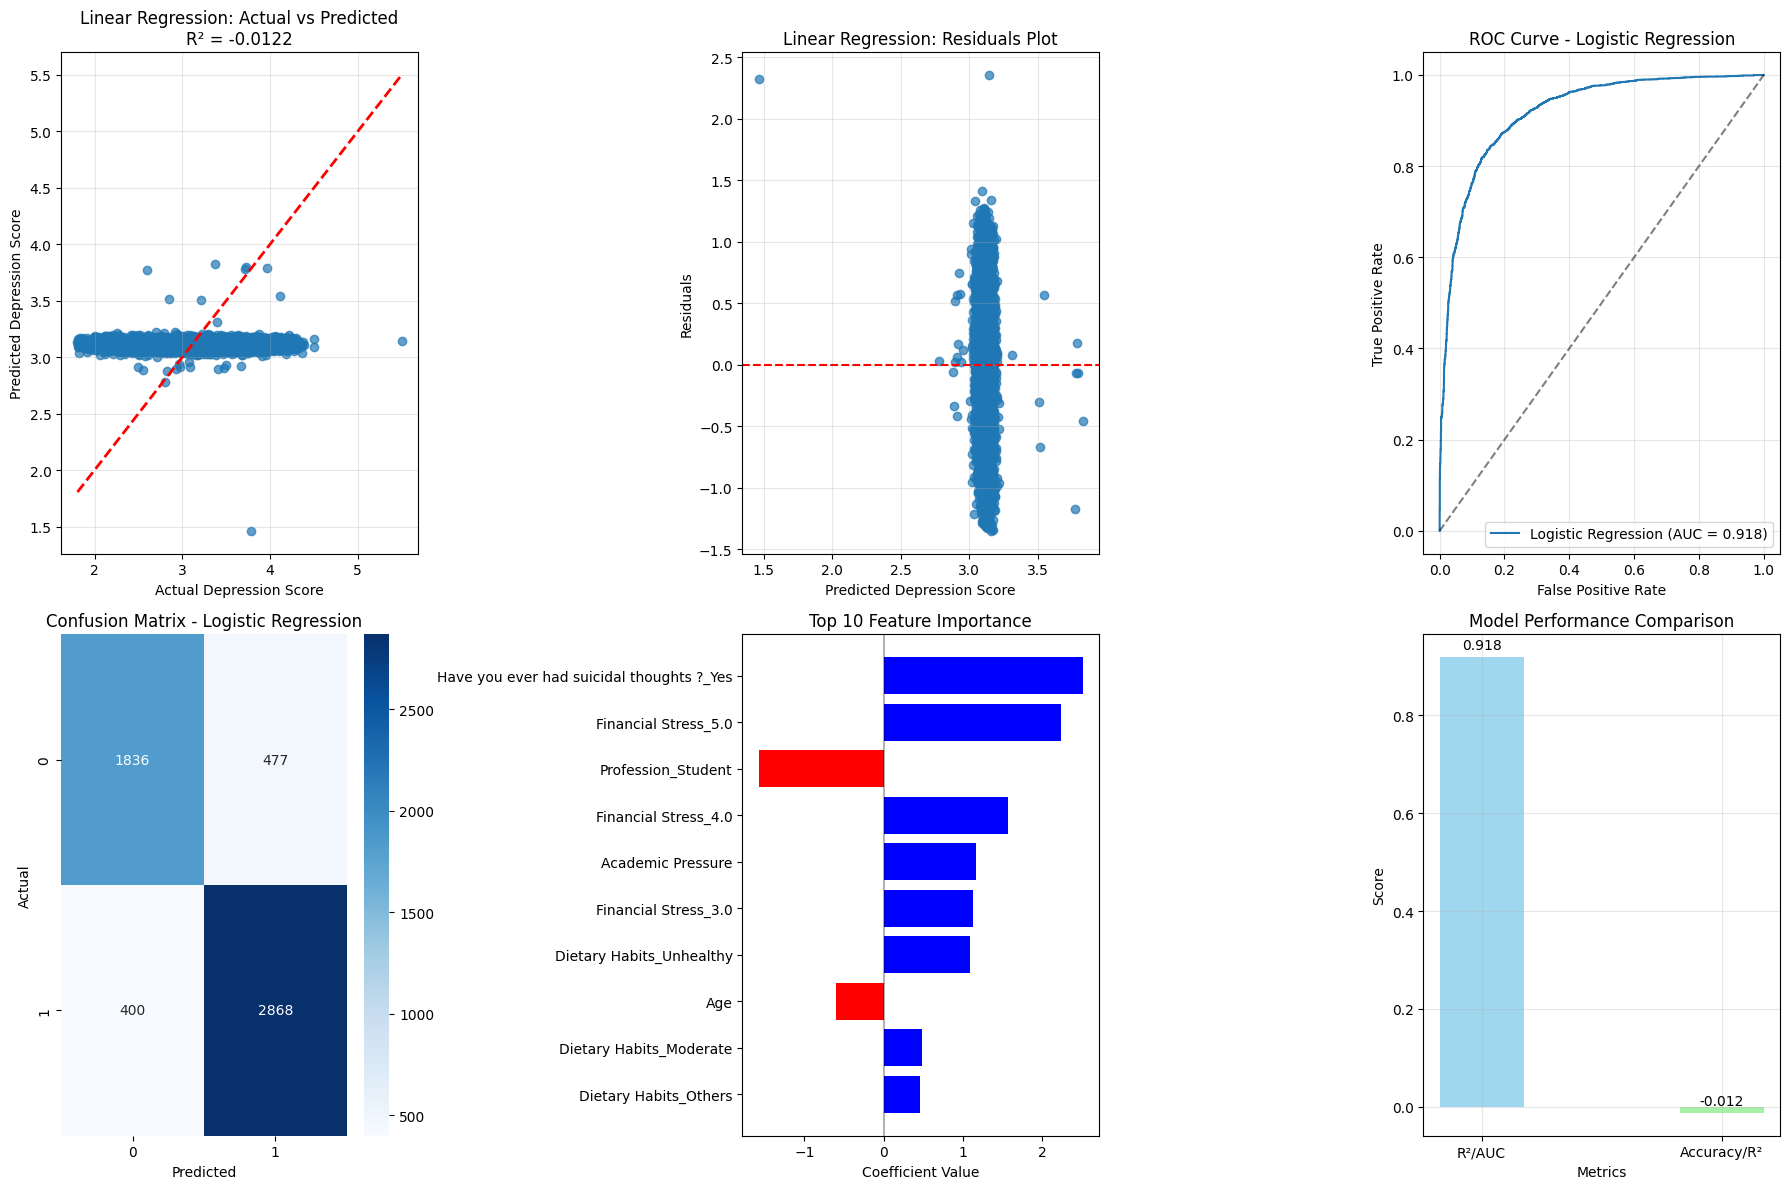


COMPREHENSIVE ANALYSIS REPORT
Dataset: 27901 samples, 18 features
Target Variable: Depression (Binary)
Depression Rate: 58.55%

LOGISTIC REGRESSION RESULTS
Accuracy: 0.8429
Precision: 0.8574
Recall: 0.8776
F1-Score: 0.8674
AUC: 0.9185

LINEAR REGRESSION RESULTS
R² Score: -0.0122
MSE: 0.2922
MAE: 0.4413

CROSS-VALIDATION RESULTS
Logistic Regression CV AUC: 0.9214 (+/- 0.0049)

KEY INSIGHTS
Top 5 Depression Risk Factors:
  1. Have you ever had suicidal thoughts ?_Yes (increases risk)
  2. Financial Stress_5.0 (increases risk)
  3. Profession_Student (decreases risk)
  4. Financial Stress_4.0 (increases risk)
  5. Academic Pressure (increases risk)

RECOMMENDATIONS
1. Focus on managing Academic and Work Pressure
2. Improve Sleep Duration and Quality
3. Address Financial Stress factors
4. Consider Family History in prevention programs
5. Monitor students with low CGPA more closely
6. Implement early intervention programs based on risk factors

ANALYSIS COMPLETED SUCCESSFULLY!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, 
                           roc_curve, mean_squared_error, r2_score, mean_absolute_error,
                           accuracy_score, precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

class StudentDepressionAnalyzer:
    """
    Simple ML Model for Student Depression Analysis
    Using only Linear Regression and Logistic Regression
    """
    
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.linear_model = None
        self.logistic_model = None
        self.results = {}
        self.feature_importance = {}
        
    def load_and_explore_data(self):
        """Load and perform initial data exploration"""
        print("=" * 60)
        print("STUDENT DEPRESSION DATASET ANALYSIS")
        print("=" * 60)
        
        # Load data
        self.df = pd.read_csv(self.data_path)
        
        print(f"Dataset shape: {self.df.shape}")
        print(f"Missing values: {self.df.isnull().sum().sum()}")
        
        # Basic statistics
        print("\nDataset Info:")
        print(self.df.info())
        
        print("\nTarget Variable Distribution:")
        print(self.df['Depression'].value_counts())
        print(f"Depression Rate: {(self.df['Depression'].sum() / len(self.df) * 100):.2f}%")
        
        # Visualize target distribution
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 3, 1)
        self.df['Depression'].value_counts().plot(kind='bar', color=['lightblue', 'coral'])
        plt.title('Depression Distribution')
        plt.xlabel('Depression Status')
        plt.ylabel('Count')
        
        # Age distribution by depression
        plt.subplot(2, 3, 2)
        sns.boxplot(data=self.df, x='Depression', y='Age')
        plt.title('Age Distribution by Depression Status')
        
        # CGPA distribution by depression
        plt.subplot(2, 3, 3)
        sns.boxplot(data=self.df, x='Depression', y='CGPA')
        plt.title('CGPA Distribution by Depression Status')
        
        # Work/Study Hours vs Depression
        plt.subplot(2, 3, 4)
        sns.boxplot(data=self.df, x='Depression', y='Work/Study Hours')
        plt.title('Work/Study Hours by Depression Status')
        
        # Academic Pressure vs Depression
        plt.subplot(2, 3, 5)
        sns.boxplot(data=self.df, x='Depression', y='Academic Pressure')
        plt.title('Academic Pressure by Depression Status')
        
        # Work Pressure vs Depression
        plt.subplot(2, 3, 6)
        sns.boxplot(data=self.df, x='Depression', y='Work Pressure')
        plt.title('Work Pressure by Depression Status')
        
        plt.tight_layout()
        plt.show()
        
        return self.df
    
    def preprocess_data(self):
        """Data preprocessing"""
        print("\n" + "=" * 50)
        print("DATA PREPROCESSING")
        print("=" * 50)
        
        # Create a copy for processing
        df_processed = self.df.copy()
        
        # Handle categorical variables
        categorical_features = ['Gender', 'City', 'Profession', 'Sleep Duration', 
                              'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                              'Financial Stress', 'Family History of Mental Illness']
        
        numerical_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                            'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']
        
        # Create preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
            ]
        )
        
        # Separate features and target
        X = df_processed.drop(['id', 'Depression'], axis=1)
        y = df_processed['Depression']
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Before preprocessing - Train shape: {self.X_train.shape}, Test shape: {self.X_test.shape}")
        
        # Fit and transform the data
        X_train_processed = preprocessor.fit_transform(self.X_train)
        X_test_processed = preprocessor.transform(self.X_test)
        
        # Get feature names after preprocessing
        numerical_feature_names = numerical_features
        categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)
        
        # Convert to DataFrame for easier handling
        self.X_train = pd.DataFrame(X_train_processed, columns=all_feature_names)
        self.X_test = pd.DataFrame(X_test_processed, columns=all_feature_names)
        
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Features: {len(all_feature_names)}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def train_linear_regression(self):
        """Train Linear Regression model for continuous prediction"""
        print("\n" + "=" * 50)
        print("LINEAR REGRESSION TRAINING")
        print("=" * 50)
        
        # Create continuous target from categorical features using only training data indices
        train_indices = self.X_train.index
        
        # Create depression score from original data
        df_train_subset = self.df.loc[self.df.index.isin(train_indices)]
        
        depression_score = (
            df_train_subset['Academic Pressure'] * 0.3 +
            df_train_subset['Work Pressure'] * 0.3 +
            (10 - df_train_subset['CGPA']) * 0.2 +  # Inverse CGPA
            (10 - df_train_subset['Study Satisfaction']) * 0.1 +
            (10 - df_train_subset['Job Satisfaction']) * 0.1
        )
        
        # Reset index to match X_train
        depression_score = depression_score.reset_index(drop=True)
        X_train_reset = self.X_train.reset_index(drop=True)
        
        # Split for regression (from already preprocessed data)
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            X_train_reset, depression_score, test_size=0.2, random_state=42
        )
        
        # Train Linear Regression
        self.linear_model = LinearRegression()
        self.linear_model.fit(X_train_reg, y_train_reg)
        
        # Predictions
        y_pred_train = self.linear_model.predict(X_train_reg)
        y_pred_test = self.linear_model.predict(X_test_reg)
        
        # Metrics
        train_mse = mean_squared_error(y_train_reg, y_pred_train)
        test_mse = mean_squared_error(y_test_reg, y_pred_test)
        train_r2 = r2_score(y_train_reg, y_pred_train)
        test_r2 = r2_score(y_test_reg, y_pred_test)
        test_mae = mean_absolute_error(y_test_reg, y_pred_test)
        
        self.results['linear_regression'] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_mae': test_mae,
            'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test,
            'y_train': y_train_reg,
            'y_test': y_test_reg
        }
        
        print(f"Linear Regression Results:")
        print(f"Train R²: {train_r2:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        
        return self.linear_model
    
    def train_logistic_regression(self):
        """Train Logistic Regression model for classification"""
        print("\n" + "=" * 50)
        print("LOGISTIC REGRESSION TRAINING")
        print("=" * 50)
        
        # Train Logistic Regression
        self.logistic_model = LogisticRegression(random_state=42, max_iter=1000)
        self.logistic_model.fit(self.X_train, self.y_train)
        
        # Predictions
        y_pred_train = self.logistic_model.predict(self.X_train)
        y_pred_test = self.logistic_model.predict(self.X_test)
        y_pred_proba = self.logistic_model.predict_proba(self.X_test)[:, 1]
        
        # Metrics
        train_acc = accuracy_score(self.y_train, y_pred_train)
        test_acc = accuracy_score(self.y_test, y_pred_test)
        precision = precision_score(self.y_test, y_pred_test)
        recall = recall_score(self.y_test, y_pred_test)
        f1 = f1_score(self.y_test, y_pred_test)
        auc = roc_auc_score(self.y_test, y_pred_proba)
        
        self.results['logistic_regression'] = {
            'train_acc': train_acc,
            'test_acc': test_acc,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test,
            'y_pred_proba': y_pred_proba
        }
        
        print(f"Logistic Regression Results:")
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        
        return self.logistic_model
    
    def analyze_feature_importance(self):
        """Analyze feature importance from Logistic Regression coefficients"""
        print("\n" + "=" * 50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("=" * 50)
        
        if self.logistic_model is None:
            print("Please train logistic regression model first!")
            return
        
        # Feature importance from coefficients
        feature_names = self.X_train.columns
        coefficients = self.logistic_model.coef_[0]
        
        # Create feature importance DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False)
        
        print("Top 15 Most Important Features:")
        print(importance_df.head(15)[['feature', 'coefficient']].to_string(index=False))
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        top_features = importance_df.head(15)
        
        colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
        
        plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Coefficient Value')
        plt.title('Top 15 Feature Importance (Logistic Regression Coefficients)')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        self.feature_importance = importance_df
        
        return importance_df
    
    def cross_validation_analysis(self):
        """Perform cross-validation analysis"""
        print("\n" + "=" * 50)
        print("CROSS-VALIDATION ANALYSIS")
        print("=" * 50)
        
        # Stratified K-Fold for imbalanced dataset
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Logistic Regression Cross-validation
        logistic_cv_scores = cross_val_score(
            LogisticRegression(random_state=42, max_iter=1000), 
            self.X_train, self.y_train, 
            cv=skf, scoring='roc_auc'
        )
        
        print(f"Logistic Regression Cross-Validation:")
        print(f"Mean AUC: {logistic_cv_scores.mean():.4f} (+/- {logistic_cv_scores.std() * 2:.4f})")
        print(f"Individual fold scores: {logistic_cv_scores}")
        
        self.results['cross_validation'] = {
            'logistic_mean_auc': logistic_cv_scores.mean(),
            'logistic_std_auc': logistic_cv_scores.std(),
            'logistic_scores': logistic_cv_scores
        }
        
        return logistic_cv_scores
    
    def visualize_results(self):
        """Create comprehensive visualization of results"""
        print("\n" + "=" * 50)
        print("CREATING VISUALIZATIONS")
        print("=" * 50)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. Linear Regression - Actual vs Predicted
        if 'linear_regression' in self.results:
            lr_results = self.results['linear_regression']
            axes[0, 0].scatter(lr_results['y_test'], lr_results['y_pred_test'], alpha=0.7)
            axes[0, 0].plot([lr_results['y_test'].min(), lr_results['y_test'].max()], 
                           [lr_results['y_test'].min(), lr_results['y_test'].max()], 
                           'r--', lw=2)
            axes[0, 0].set_xlabel('Actual Depression Score')
            axes[0, 0].set_ylabel('Predicted Depression Score')
            axes[0, 0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_results["test_r2"]:.4f}')
            axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Linear Regression - Residuals
        if 'linear_regression' in self.results:
            lr_results = self.results['linear_regression']
            residuals = lr_results['y_test'] - lr_results['y_pred_test']
            axes[0, 1].scatter(lr_results['y_pred_test'], residuals, alpha=0.7)
            axes[0, 1].axhline(y=0, color='r', linestyle='--')
            axes[0, 1].set_xlabel('Predicted Depression Score')
            axes[0, 1].set_ylabel('Residuals')
            axes[0, 1].set_title('Linear Regression: Residuals Plot')
            axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Logistic Regression - ROC Curve
        if 'logistic_regression' in self.results:
            lr_results = self.results['logistic_regression']
            fpr, tpr, _ = roc_curve(self.y_test, lr_results['y_pred_proba'])
            axes[0, 2].plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_results["auc"]:.3f})')
            axes[0, 2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
            axes[0, 2].set_xlabel('False Positive Rate')
            axes[0, 2].set_ylabel('True Positive Rate')
            axes[0, 2].set_title('ROC Curve - Logistic Regression')
            axes[0, 2].legend()
            axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Logistic Regression - Confusion Matrix
        if 'logistic_regression' in self.results:
            lr_results = self.results['logistic_regression']
            cm = confusion_matrix(self.y_test, lr_results['y_pred_test'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
            axes[1, 0].set_title('Confusion Matrix - Logistic Regression')
            axes[1, 0].set_xlabel('Predicted')
            axes[1, 0].set_ylabel('Actual')
        
        # 5. Feature Importance (Top 10)
        if hasattr(self, 'feature_importance') and len(self.feature_importance) > 0:
            top_10 = self.feature_importance.head(10)
            
            colors = ['red' if x < 0 else 'blue' for x in top_10['coefficient']]
            
            axes[1, 1].barh(range(len(top_10)), top_10['coefficient'], color=colors)
            axes[1, 1].set_yticks(range(len(top_10)))
            axes[1, 1].set_yticklabels(top_10['feature'])
            axes[1, 1].set_xlabel('Coefficient Value')
            axes[1, 1].set_title('Top 10 Feature Importance')
            axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
            axes[1, 1].invert_yaxis()
        
        # 6. Model Performance Comparison
        if 'linear_regression' in self.results and 'logistic_regression' in self.results:
            lr_reg = self.results['linear_regression']
            lr_clf = self.results['logistic_regression']
            
            # Normalize metrics for comparison
            metrics = ['R²/AUC', 'Accuracy/R²']
            lr_scores = [lr_clf['auc'], lr_reg['test_r2']]
            
            x = np.arange(len(metrics))
            width = 0.35
            
            bars = axes[1, 2].bar(x, lr_scores, width, alpha=0.8, color=['skyblue', 'lightgreen'])
            axes[1, 2].set_xlabel('Metrics')
            axes[1, 2].set_ylabel('Score')
            axes[1, 2].set_title('Model Performance Comparison')
            axes[1, 2].set_xticks(x)
            axes[1, 2].set_xticklabels(metrics)
            axes[1, 2].grid(True, alpha=0.3)
            
            # Add value labels on bars
            for i, bar in enumerate(bars):
                height = bar.get_height()
                axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                               f'{lr_scores[i]:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    
    def generate_final_report(self):
        """Generate comprehensive final report"""
        print("\n" + "=" * 60)
        print("COMPREHENSIVE ANALYSIS REPORT")
        print("=" * 60)
        
        print(f"Dataset: {self.df.shape[0]} samples, {self.df.shape[1]} features")
        print(f"Target Variable: Depression (Binary)")
        print(f"Depression Rate: {(self.df['Depression'].sum() / len(self.df) * 100):.2f}%")
        
        print("\n" + "="*40)
        print("LOGISTIC REGRESSION RESULTS")
        print("="*40)
        
        if 'logistic_regression' in self.results:
            lr_results = self.results['logistic_regression']
            print(f"Accuracy: {lr_results['test_acc']:.4f}")
            print(f"Precision: {lr_results['precision']:.4f}")
            print(f"Recall: {lr_results['recall']:.4f}")
            print(f"F1-Score: {lr_results['f1']:.4f}")
            print(f"AUC: {lr_results['auc']:.4f}")
        
        print("\n" + "="*40)
        print("LINEAR REGRESSION RESULTS")
        print("="*40)
        
        if 'linear_regression' in self.results:
            lr_results = self.results['linear_regression']
            print(f"R² Score: {lr_results['test_r2']:.4f}")
            print(f"MSE: {lr_results['test_mse']:.4f}")
            print(f"MAE: {lr_results['test_mae']:.4f}")
        
        print("\n" + "="*40)
        print("CROSS-VALIDATION RESULTS")
        print("="*40)
        
        if 'cross_validation' in self.results:
            cv_results = self.results['cross_validation']
            print(f"Logistic Regression CV AUC: {cv_results['logistic_mean_auc']:.4f} (+/- {cv_results['logistic_std_auc']*2:.4f})")
        
        print("\n" + "="*40)
        print("KEY INSIGHTS")
        print("="*40)
        
        # Top risk factors
        if hasattr(self, 'feature_importance') and len(self.feature_importance) > 0:
            print(f"Top 5 Depression Risk Factors:")
            top_5_risk = self.feature_importance.head(5)
            for i, (_, row) in enumerate(top_5_risk.iterrows(), 1):
                direction = "increases" if row['coefficient'] > 0 else "decreases"
                print(f"  {i}. {row['feature']} ({direction} risk)")
        
        print("\n" + "="*40)
        print("RECOMMENDATIONS")
        print("="*40)
        print("1. Focus on managing Academic and Work Pressure")
        print("2. Improve Sleep Duration and Quality")
        print("3. Address Financial Stress factors")
        print("4. Consider Family History in prevention programs")
        print("5. Monitor students with low CGPA more closely")
        print("6. Implement early intervention programs based on risk factors")

# Usage Example
def main():
    """Main execution function"""
    # Initialize analyzer
    analyzer = StudentDepressionAnalyzer('./data/linear-regression/student_depression_dataset.csv')
    
    # Run complete analysis pipeline
    try:
        # 1. Load and explore data
        analyzer.load_and_explore_data()
        
        # 2. Preprocess data
        analyzer.preprocess_data()
        
        # 3. Train Linear Regression
        analyzer.train_linear_regression()
        
        # 4. Train Logistic Regression
        analyzer.train_logistic_regression()
        
        # 5. Analyze feature importance
        analyzer.analyze_feature_importance()
        
        # 6. Cross-validation analysis
        analyzer.cross_validation_analysis()
        
        # 7. Visualize results
        analyzer.visualize_results()
        
        # 8. Generate final report
        analyzer.generate_final_report()
        
        print("\n" + "="*60)
        print("ANALYSIS COMPLETED SUCCESSFULLY!")
        print("="*60)
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()